### Combine all of the datasets to a singel dataset

In [1]:
import pandas as pd
import numpy as np
import re
import glob
import matplotlib.pyplot as plt

## data file
path1 = r'data' # use your path
all_files1 = glob.glob(path1 + "/*.csv")

## data-2 file
path2 = r'data-2' # use your path
all_files2 = glob.glob(path2 + "/*.csv")

li = []

## append all the csv files in data file to the list
for filename in all_files1:
    df = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
    li.append(df)
    
## append all the csv files in data-2 file to the list
for filename in all_files2:
    df = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
    li.append(df)    

## combine all the csv files into a dataframe
frame = pd.concat(li, ignore_index=True)

frame.head()

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore,...,DurationofTime,Talked to people,Relax your eyes,SocialInteraction,StressFrequency,Coffees,Teas,PerformedOutside?,TimeOfFirstStop,EfficiencyDegree
0,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,08:30,08:45,15.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T695,NaN,Travelling,17/02/2022,20.0,Thursday,09:00,09:30,30.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EL642,NaN,Education/Lectures,17/02/2022,20.0,Thursday,09:30,11:45,135.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EL642,NaN,Education/Lectures,17/02/2022,20.0,Thursday,12:00,13:00,60.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,13:15,14:00,45.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dealing with data wrangling issues

In [2]:
## exclude personal identifiable information
df = frame[['PrimaryActivityCode', 'SecondaryActivityCode', 'StartDate', 'UniBathWeekNo', 'DayOfWeek', 'StartTime', 'EndTime', 'DurationMins', 'EnjoymentScore']]

## drop the columns with all Nans
df = df.dropna(how='all')

## check activity code is recognisable
## remain recogniseable activity code rows include Nan
recongise_code = ['ED145',
                 'EL642',
                 'X893',
                 'H179',
                 'L418',
                 'R523',
                 'S801',
                 'T695',
                 'UD415',
                 'PW101',
                 'CW982',
                 'O733']

def name_change_week(x):
    x = x.lower()
    x = x.replace(' ','')
    if x == 'fri' or x == 'friday':
        return 'Friday'
    elif x == 'mon' or x == 'monday':
        return 'Monday'
    elif x == 'tue' or x == 'tues' or x == 'tuesday' or x == 'tusday':
        return 'Tuesday'
    elif x == 'wed' or x == 'wednsday' or x == 'wendnesday' or x == 'wednesday':
        return 'Wednesday'
    elif x == 'thu' or x == 'thur' or x == 'thursday':
        return 'Thursday'
    elif x == 'sat' or x == 'saturday':
        return 'Saturday'
    elif x == 'sun' or x == 'sunday':
        return 'Sunday'

def recongise(a):
    if a in recongise_code:
        return a
    else:
        pass

df['PrimaryActivityCode'] = df[pd.notnull(df['PrimaryActivityCode'])]['PrimaryActivityCode'].apply(recongise)
df['SecondaryActivityCode'] = df[pd.notnull(df['SecondaryActivityCode'])]['SecondaryActivityCode'].apply(recongise)

df['DayOfWeek'] = df[pd.notnull(df['DayOfWeek'])]['DayOfWeek'].apply(name_change_week)

## Reset index
df = df.reset_index()
df = df.drop(columns=['index'])

## Change all the date and time into the same format
## Ensure different date/time formats are resolved
for i in range(len(df['StartDate'])):
    df['StartDate'] = pd.to_datetime(df['StartDate'], errors = 'coerce')
    
df['StartTime'] = [str(df['StartTime'][i])[:5] for i in range(len(df['StartTime']))]
df['EndTime'] = [str(df['EndTime'][i])[:5] for i in range(len(df['EndTime']))]

## Make sure duration minutes is smaller than 24 hours for making sense
df = df[df['DurationMins']<=1440]

df.head()

,PrimaryActivityCode,SecondaryActivityCode,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,ED145,L418,2022-02-17,20.0,Thursday,08:30,08:45,15.0,1.0
1,T695,NaN,2022-02-17,20.0,Thursday,09:00,09:30,30.0,-1.0
2,EL642,NaN,2022-02-17,20.0,Thursday,09:30,11:45,135.0,0.0
3,EL642,NaN,2022-02-17,20.0,Thursday,12:00,13:00,60.0,1.0
4,ED145,L418,2022-02-17,20.0,Thursday,13:15,14:00,45.0,2.0


### Deal with different publicly dataset

In [3]:
## Import different publicly dataset from:
## https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=tus_00age&lang=en

p_df = pd.read_csv('tus_00age_1_Data.csv')

p_df = p_df[p_df['UNIT'] == 'Time spent (hh:mm)']

p_df = p_df[['ACL00', 'Value']]
p_df = p_df[p_df['ACL00'] != 'Total']
## Categorise the title from public dataset to the same title with our dataset
def name_categorise(x):
    if x == 'Eating' or x == 'Food management except dish washing':
        return 'Eating/Drinking'
    
    elif x == 'Study' or x == 'Free time study' or x == 'Teaching, reading and talking with child':
        return 'Education/Lectures'
    
    elif x == 'Walking and hiking' or x == 'Sports and outdoor activities except walking and hiking':
        return 'Exercise'
    
    elif x == 'Cleaning dwelling' or x == 'Dish washing' or x == 'Household upkeep except cleaning dwelling' or x == 'Laundry' or x == 'Ironing':
        return 'Housework'
    
    elif x == 'Household and family care' or x == 'Shopping and services' or x == 'Leisure, social and associative life' or x == 'Participatory activities' or x == 'Visiting and feasts' or x == 'Other social life' or x == 'Entertainment and culture' or x == 'Hobbies and games except computing and computer games' or x == 'Radio and music':
        return 'Leisure'
    
    elif x == 'Reading books':
        return 'Reading'
    
    elif x == 'Sleep' or x == 'Resting':
        return 'Sleep'
    
    elif x == 'Main and second job and related travel' or x == 'Travel except travel related to jobs' or x == 'Travel to/from work' or x == 'Travel related to study' or x == 'Travel related to shopping and services' or x == 'Transporting a child' or x == 'Travel related to other household purposes' or x == 'Travel related to leisure, social and associative life' or x == 'Unspecified travel':
        return 'Travelling'
    
    elif x == 'Computer games' or x == 'Computing' or x == 'TV and video':
        return 'Using Devices'
    
    elif x == 'Employment, related activities and travel as part of/during main and second job' or x == 'Activities related to employment and unspecified employment':
        return 'Paid Work'
    
    elif x == 'School and university except homework' or x == 'Homework':
        return 'Coursework'
    
    else:
        return 'Other'

p_df['ACL00'] = p_df[pd.notnull(p_df['ACL00'])]['ACL00'].apply(name_categorise)

p_df = p_df.reset_index()
p_df = p_df.drop(columns=['index'])

## Change columns name
p_df = p_df.rename(columns={"ACL00": "Activity", "Value": "Time"}, errors="raise")

## Cleaning the time in public dataset
def adjust_time(i):
    i = i.split(':')
    if i[0] != '' and len(i) == 2:
        a = round(int(i[0]) * 60 + int(i[1]), 1)
        return a
    elif len(i) == 1:
        return i[0]
    else:
        pass
## Make differnt types of numbers into float to do the calculation
def to_int(x):
    return float(x)

p_df['Time'] = p_df[pd.notnull(p_df['Time'])]['Time'].apply(adjust_time)


p_df = p_df.dropna()
p_df['Time'] = p_df[pd.notnull(p_df['Time'])]['Time'].apply(to_int)

p_df.head()

,Activity,Time
0,Other,658.0
1,Other,705.0
2,Other,649.0
3,Other,633.0
5,Other,668.0


In [4]:
## create a table contains the mean time of people doing different activities in public dataset.
p_activity = p_df.groupby(p_df['Activity']).mean()
p_activity = p_activity.reindex(["Coursework", "Eating/Drinking", "Education/Lectures", 'Housework', 'Leisure', 'Other', 'Paid Work', 'Reading', 'Sleep', 'Travelling', 'Using Devices', 'Exercise']).reset_index()
p_activity['minspercentage'] = (p_activity['Time']/p_activity['Time'].sum()*100)
p_activity

,Activity,Time,minspercentage
0,Coursework,8.687500,1.263337
1,Eating/Drinking,72.734375,10.577038
2,Education/Lectures,9.810526,1.426647
3,Housework,13.093750,1.904094
4,Leisure,67.194444,9.771421
5,Other,53.911950,7.839880
6,Paid Work,89.234375,12.976469
7,Reading,7.718750,1.122461
8,Sleep,266.578125,38.765811
9,Travelling,35.982394,5.232562


## My Question:
#### 1. What do people usually do during their daily life?

#### 2. What do Bath students do most in their daily life?

#### 3. What do European do most in their daily life?

In [5]:
## create a table contains the mean time of people doing different activities in our own dataset.
primary = df.groupby(df['PrimaryActivityCode']).mean().reset_index()

def name_changing(x):
    if x == 'ED145':
        return 'Eating/Drinking'
    elif x == 'EL642':
        return 'Education/Lectures'
    elif x == 'X893':
        return 'Exercise'
    elif x == 'H179':
        return 'Housework'
    elif x == 'L418':
        return 'Leisure'
    elif x == 'R523':
        return 'Reading'
    elif x == 'S801':
        return 'Sleep'
    elif x == 'T695':
        return 'Travelling'
    elif x == 'UD415':
        return 'Using Devices'
    elif x == 'PW101':
        return 'Paid Work'
    elif x == 'CW982':
        return 'Coursework'
    elif x == 'O733':
        return 'Other'

## Change the activity code to the activity respectively.
primary['PrimaryActivityCode'] = primary[pd.notnull(primary['PrimaryActivityCode'])]['PrimaryActivityCode'].apply(name_changing)
primary['DurationMins'] = primary[pd.notnull(primary['DurationMins'])]['DurationMins'].apply(to_int)
primary['minspercentage'] = (primary['DurationMins']/primary['DurationMins'].sum()*100)
primary

,PrimaryActivityCode,UniBathWeekNo,DurationMins,EnjoymentScore,minspercentage
0,Coursework,22.093979,129.738372,-0.079511,9.359025
1,Eating/Drinking,21.049822,49.844737,1.151086,3.595684
2,Education/Lectures,20.955056,106.782051,0.148789,7.703009
3,Housework,22.104027,52.122112,-0.243636,3.759968
4,Leisure,21.310391,99.194892,1.438028,7.155689
5,Other,20.580920,43.169720,0.586957,3.114163
6,Paid Work,20.135802,228.635294,0.000000,16.493219
7,Reading,21.297674,87.481651,0.751269,6.310723
8,Sleep,21.131661,414.758437,1.227941,29.919711
9,Travelling,19.820513,41.458525,0.187500,2.990722


## Answer:
#### 1. The graph below shows that sleeping is the most common thing people do in their daily life, followed by paid work on both bath students and Europe people. We have education, lectures and do courseworks more frequently and spend a lot more time on reading than others whereas other people using devices and leisure more than us.

#### 2. Bath students spent most of their time on sleeping, paid work and coursework.

#### 3. Europeans spent their time on sleeping most then followed by paid work then eating and drinking.

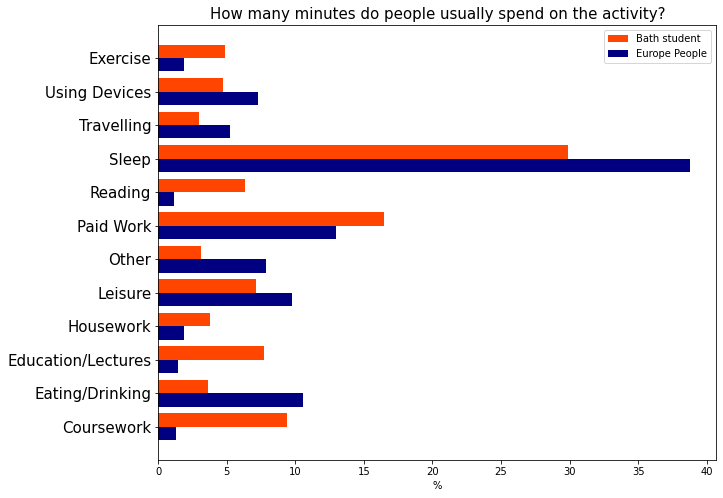

In [6]:
## Plot out bar chart to see which activity is the most common one in people's daily life in our dataset 
## compare with public datasetking

fig, ax = plt.subplots(figsize=(10,8))
legends = ['Bath student', 'Europe People']
width=0.4

labels = ['Coursework', 'Eating/Drinking', 'Education/Lectures', 'Housework', 'Leisure', 'Other', 'Paid Work', 'Reading', 'Sleep', 'Travelling', 'Using Devices', 'Exercise']
x = np.arange(len(labels))

b1 = plt.barh(x, primary['minspercentage'], width, label="Bar 1", color='orangered')
b2 = plt.barh(x - width, p_activity['minspercentage'], width, label="Bar 2", color='navy')

ax.set(yticks=x-width/2, yticklabels=labels)

plt.legend(legends)

plt.title('How many minutes do people usually spend on the activity?', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('%')
plt.show()
fig.savefig('barchart.png')



## My hypothesis

#### 1. I assume Bath students do coursework on Monday to Thursday more than Friday to Sunday because I think people do not like to work on weekends and normally hang out with friends on Fridays.

#### 2. If only look at weekdays, I assume Bath students do their courseworks on Thursdays the most because most of our deadline is on Fridays. Therefore, people tend to do the works the day before deadline.

In [7]:
## create a table only includes doing coursework
cw = df[df['PrimaryActivityCode'] == 'CW982']
## create a table that shows the average minutes people spend on coursework in every day of week.
cw_week = cw.groupby(['DayOfWeek'])['DurationMins'].mean()
cw_week = cw_week.reindex(["Monday", "Tuesday", "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
cw_week

,DayOfWeek,DurationMins
0,Monday,118.787402
1,Tuesday,148.152778
2,Wednesday,118.290323
3,Thursday,108.566667
4,Friday,140.753846
5,Saturday,131.270833
6,Sunday,152.977778


## Hypothesis conclusions:
#### 1. The pie chart below shows people do their coursework on Monday to Thursday the most which means my assumption was correct. If we see each day of the week separately, we can find out that people tend to do their coursework on Sundays, Tuesdays and Fridays.

#### 2. Actually Bath students do their coursework on Tuesdays the most which the graph below illustrates my hypothesis of people do their coursework on Thursdays was incorrect.

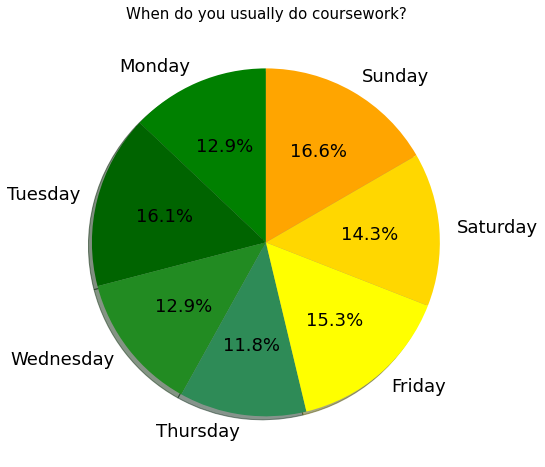

In [8]:
## Plot out pie chart to see the proportion of people doing coursework on every day of week.
fig = plt.figure(figsize=(8,8))
color = ['green', 'darkgreen', 'forestgreen', 'seagreen', 'yellow', 'gold', 'orange']
explode = (0., 0., 0., 0., 0., 0., 0.)
plt.pie(cw_week['DurationMins'], labels=cw_week['DayOfWeek'], autopct='%1.1f%%', textprops={'fontsize': 18}, explode=explode, shadow=True, colors=color, startangle=90)
plt.title('When do you usually do coursework?', fontsize=15)
plt.show()
fig.savefig('piechart.png')